Коэффициенты: [ 2.4952345  -1.27387051]
Смещение (intercept): 4.687960441167484


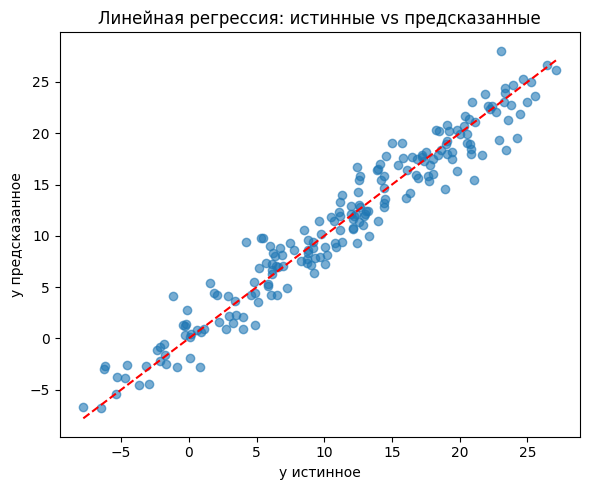

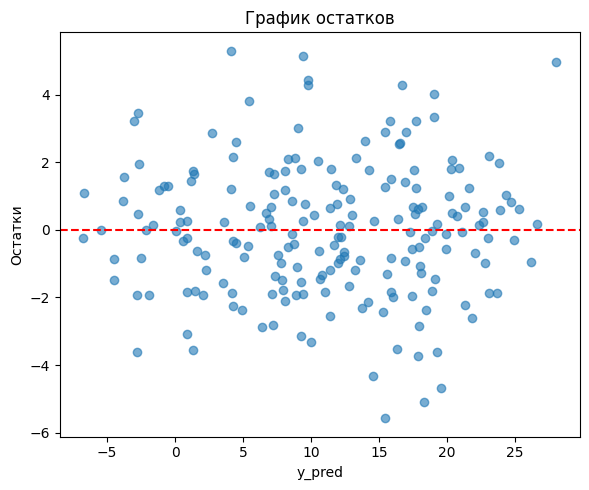

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
from sklearn.linear_model import LinearRegression 

# Генерируем синтетические данные: 2 признака + шум
np.random.seed(0)
n = 200
X = np.random.rand(n, 2) * 10
coeff = np.array([2.5, -1.3])
y = X @ coeff + 5 + np.random.randn(n) * 2.0  # шум σ=2.0

# Обучаем модель
model = LinearRegression()
model.fit(X, y)
print("Коэффициенты:", model.coef_)
print("Смещение (intercept):", model.intercept_)

# Предсказания
y_pred = model.predict(X)

# Визуализация результата: scatter истинное vs предсказанное
plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("y истинное")
plt.ylabel("y предсказанное")
plt.title("Линейная регрессия: истинные vs предсказанные")
plt.tight_layout()
plt.show()

# График остатков
resid = y_pred - y
plt.figure(figsize=(6, 5))
plt.scatter(y_pred, resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("y_pred")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.tight_layout()
plt.show()


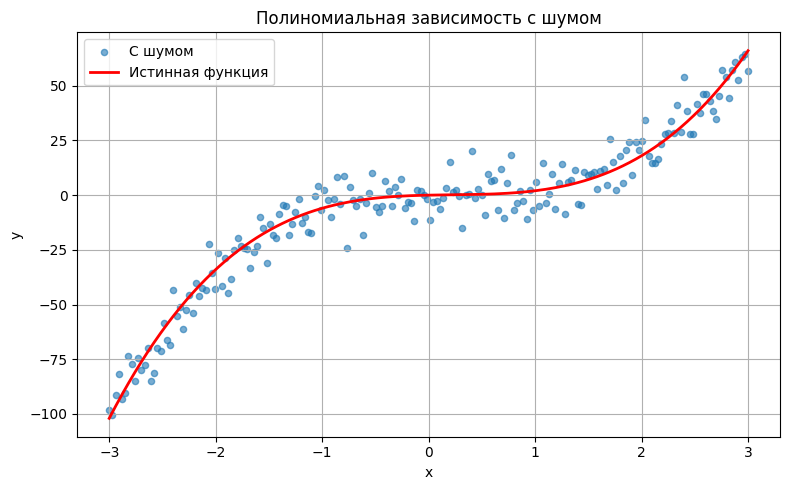

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Повторяемость
np.random.seed(42)

# Генерируем данные
n = 200
X = np.linspace(-3, 3, n).reshape(-1, 1)
true_function = lambda x: 3 * x**3 - 2 * x**2 + x
noise = np.random.normal(0, 8, size=X.shape[0])  # нормальный шум
y = true_function(X.flatten()) + noise

# Визуализация
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="С шумом", s=20, alpha=0.6)
plt.plot(X, true_function(X), color='red', label="Истинная функция", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Полиномиальная зависимость с шумом")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Пример расширенного признака: ['x0' 'x0^2' 'x0^3']


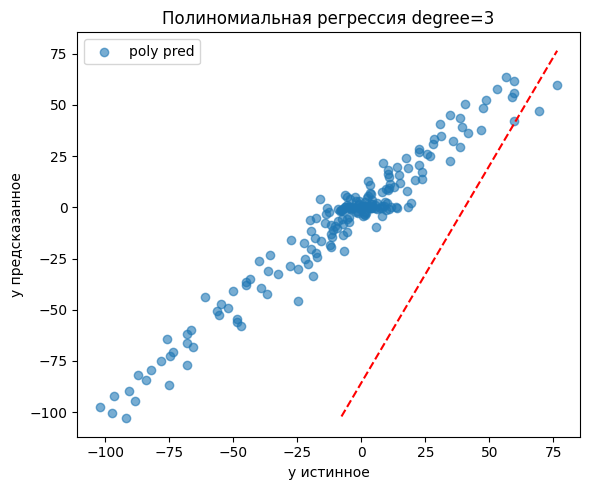

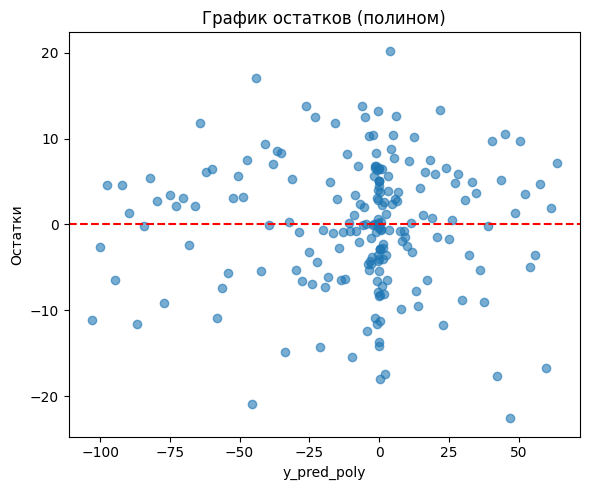

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Используем те же X, y
# Генерируем данные
n = 200
X_ = np.linspace(-3, 3, n).reshape(-1, 1)
true_function = lambda x: 3 * x**3 - 2 * x**2 + x
noise = np.random.normal(0, 8, size=X_.shape[0])  # нормальный шум
y_ = true_function(X_.flatten()) + noise
degree = 3
pipeline = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())

pipeline.fit(X_, y_)
y_pred_poly = pipeline.predict(X_)

print("Пример расширенного признака:", pipeline.named_steps['polynomialfeatures'].get_feature_names_out())

# Визуализация: scatter истинное vs полиномиальное предсказанное
plt.figure(figsize=(6,5))
plt.scatter(y_, y_pred_poly, alpha=0.6, label='poly pred')
plt.plot([y.min(), y_.max()], [y_.min(), y_.max()], 'r--')
plt.xlabel("y истинное")
plt.ylabel("y предсказанное")
plt.legend()
plt.title(f"Полиномиальная регрессия degree={degree}")
plt.tight_layout()
plt.show()

# Остатки
plt.figure(figsize=(6,5))
plt.scatter(y_pred_poly, y_pred_poly - y_, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("y_pred_poly")
plt.ylabel("Остатки")
plt.title("График остатков (полином)")
plt.tight_layout()
plt.show()
